<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray, rgba2rgb

In [2]:
myfigsize = (16,9)


(768, 1024) float64


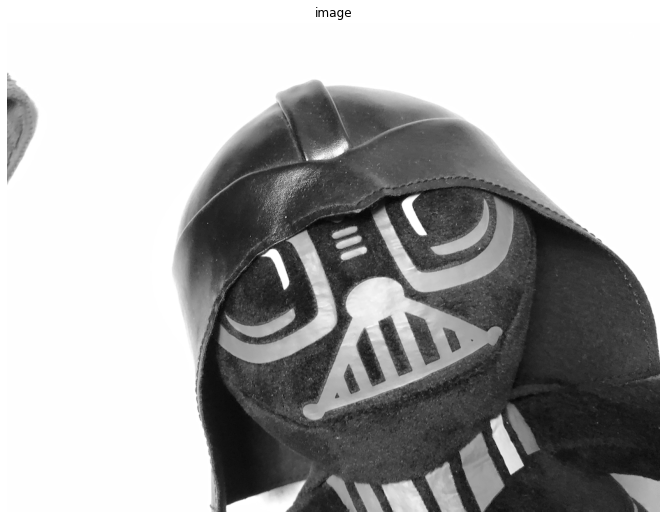

In [3]:
img_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/d02.png'
img = rgb2gray(rgba2rgb(io.imread(img_url)))
print(img.shape,img.dtype)
plt.figure(figsize=myfigsize)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('image')
plt.show()

In [4]:
import scipy.signal as signal

In [5]:
Ts = 4
f = np.array(img[::Ts,::Ts])
print(f.shape,f.dtype)

(192, 256) float64


## 2D Convolution

[[-0.55199078 -0.74911192 -1.67457138]
 [ 0.64569773  1.41854958  2.37516643]
 [-0.99791564 -1.01282099 -0.02851814]]
-0.5755151203164873


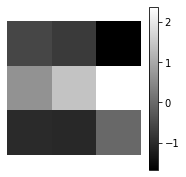

In [6]:
w = np.random.randn(3,3)
#w = np.array([[3,6,9],
#               [9,-6,3],
#               [3,9,-6]])
print(w)
print(np.sum(w))

plt.figure(figsize=(3,3))
plt.imshow(w,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

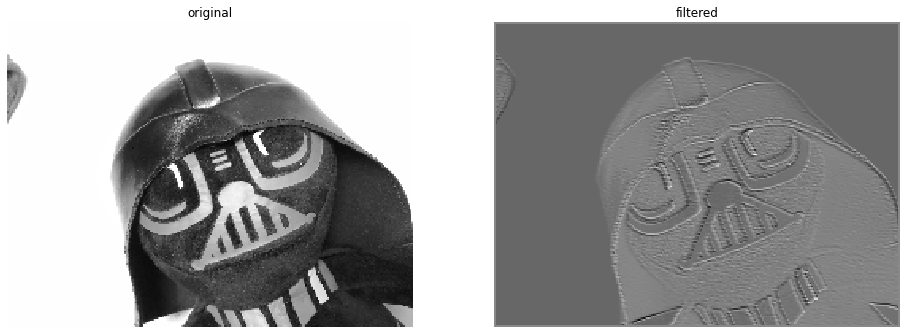

In [7]:
sz0,sz1 = f.shape
y = np.zeros_like(f)
for i in np.arange(1,sz0-1):
  for j in np.arange(1,sz1-1):
    y[i,j] = np.sum(f[i-1:i+2,j-1:j+2]*w[::-1,::-1])
    
plt.figure(figsize=myfigsize)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(y,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.show()

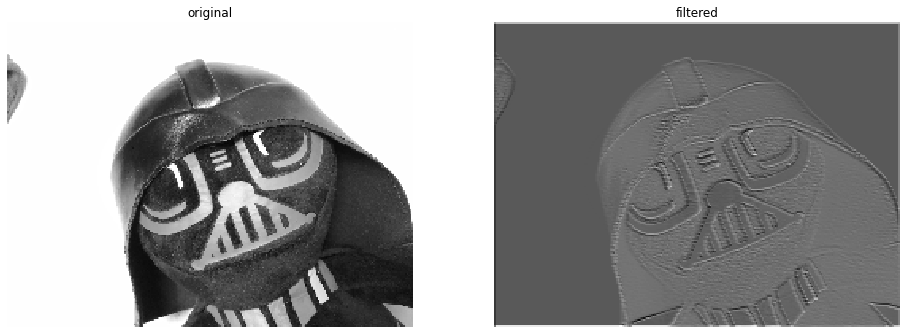

In [8]:
y_b = signal.convolve2d(f,w,mode='same')
y_b.shape

plt.figure(figsize=myfigsize)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(y_b,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.show()

## Lowpass Filtering - Box kernel

In [9]:
wb = np.array( [[1,1,1],[1,1,1],[1,1,1]] )
print(wb)
print(np.sum(wb))
wb = wb/np.sum(wb)
print(wb)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
9
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [10]:
y_b = signal.convolve2d(f,wb,mode='same')
y_b.shape

(192, 256)

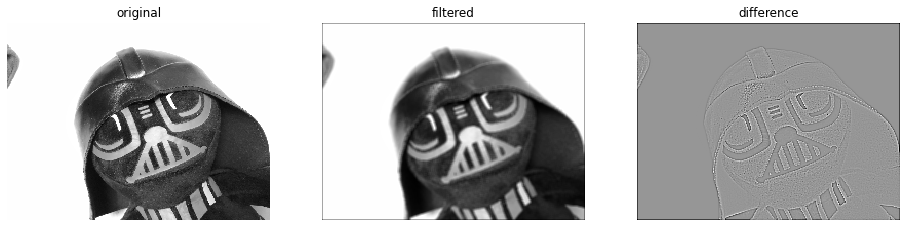

In [11]:
plt.figure(figsize=myfigsize)
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(y_b,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.subplot(1,3,3)
plt.imshow(y_b-f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('difference')
plt.show()

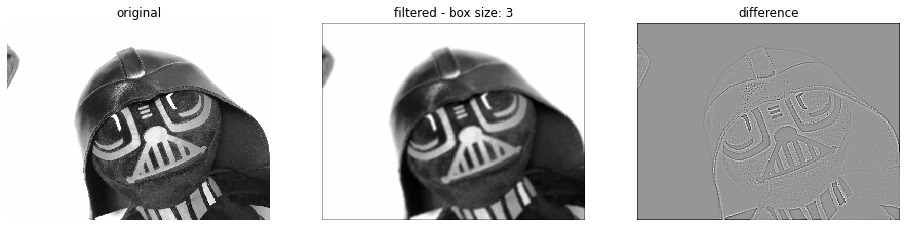

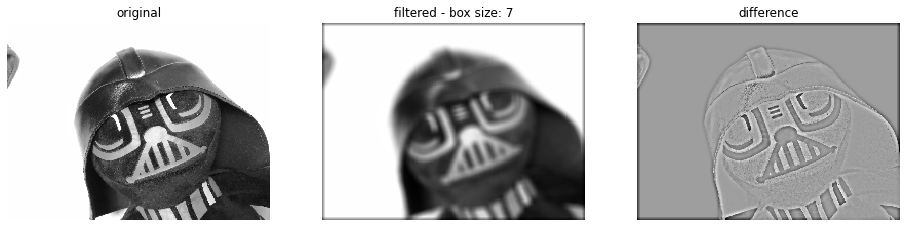

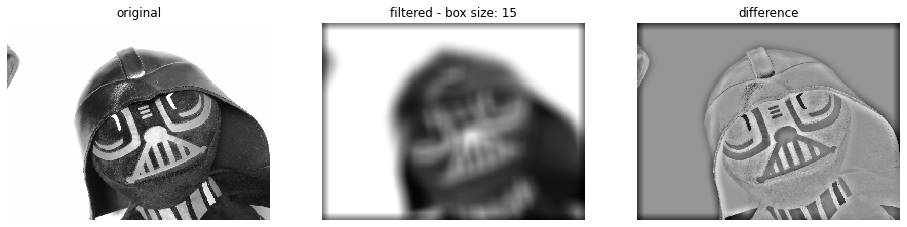

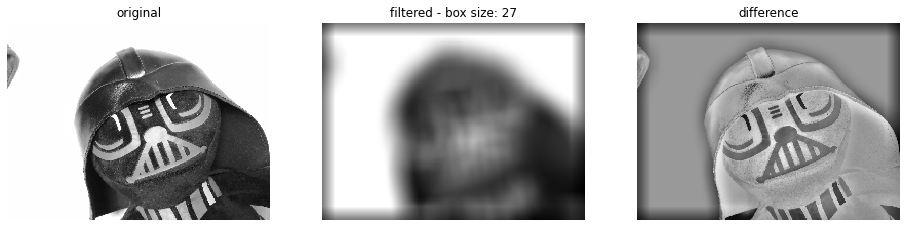

In [12]:
for N in np.array([3,7,15,27]):
  wb = np.ones((N,N))
  wb = wb/np.sum(wb)
  y_b = signal.convolve2d(f,wb,mode='same')

  plt.figure(figsize=myfigsize)
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_b,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title(f'filtered - box size: {N}')
  plt.subplot(1,3,3)
  plt.imshow(y_b-f,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title('difference')
  plt.show()

## Lowpass Filtering - Gaussian kernel

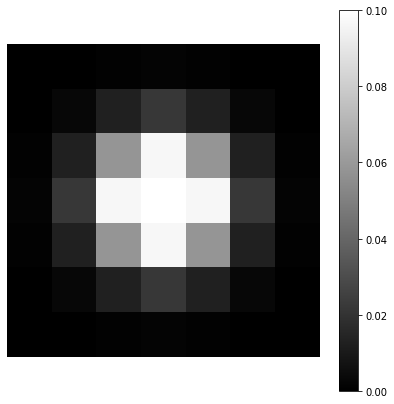

In [13]:
N = 3
std = 1
s = np.arange(-N,N+1,1)
t = np.arange(-N,N+1,1)
S,T = np.meshgrid(s,t)
wg = np.exp(-(S**2+T**2)/(2*std*std))
wg = wg/np.sum(wg)

plt.figure(figsize=(7,7))
plt.imshow(wg,vmin=0,vmax=0.1,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

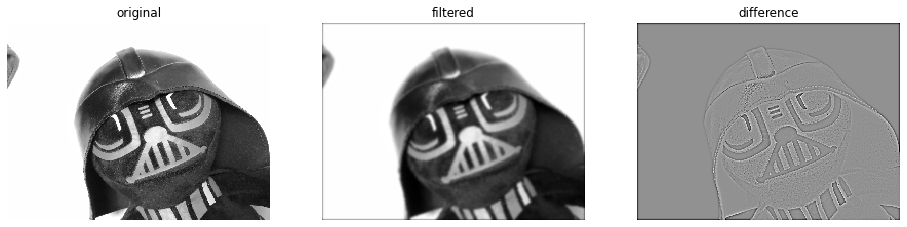

In [14]:
y_g = signal.convolve2d(f,wg,mode='same')

plt.figure(figsize=myfigsize)
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(y_g,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.subplot(1,3,3)
plt.imshow(y_g-f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('difference')
plt.show()

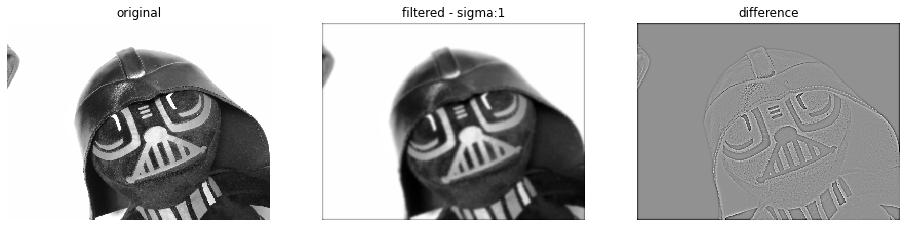

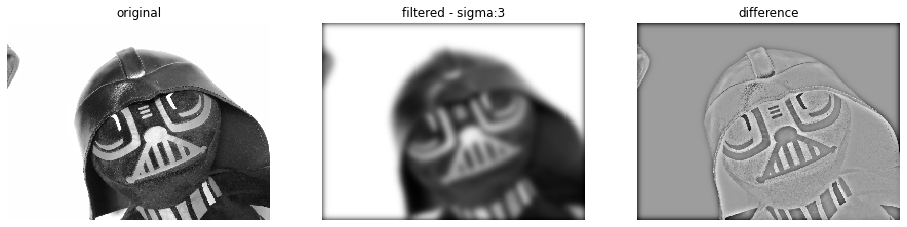

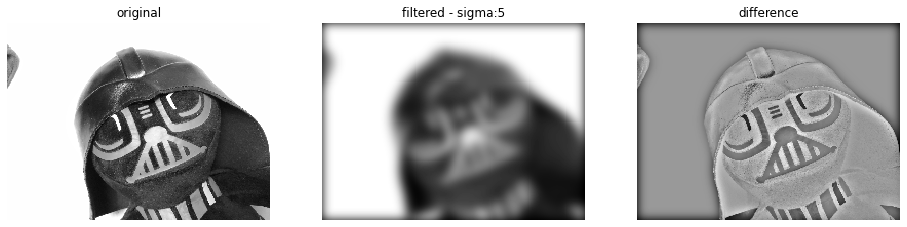

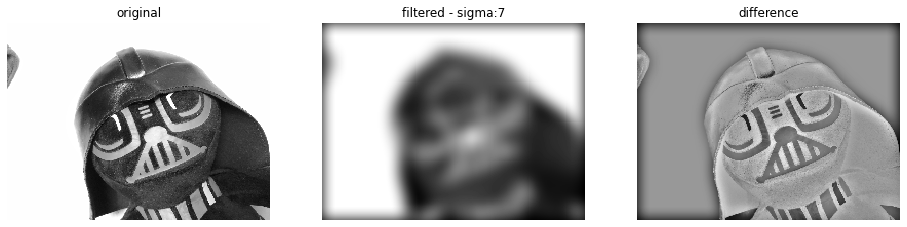

In [15]:
s = np.arange(-13,14,1)
t = np.arange(-13,14,1)
S,T = np.meshgrid(s,t)

for std in np.array([1,3,5,7]):
  wg = np.exp(-(S**2+T**2)/(2*std*std))
  wg = wg/np.sum(wg)

  y_g = signal.convolve2d(f,wg,mode='same')

  plt.figure(figsize=myfigsize)
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_g,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title(f'filtered - sigma:{std}')
  plt.subplot(1,3,3)
  plt.imshow(y_g-f,cmap='gray',interpolation='nearest')
  plt.axis('off')
  plt.title('difference')
  plt.show()

## Exercise
- 아래의 MRI영상은 뒤 쪽은 상대적으로 밝고, 중심부는 상대적으로 어둡다. 
- Lowpass filtering과 image subtraction을 이용하여 보다 균일하게 만들어 보자. 

(256, 220) float64


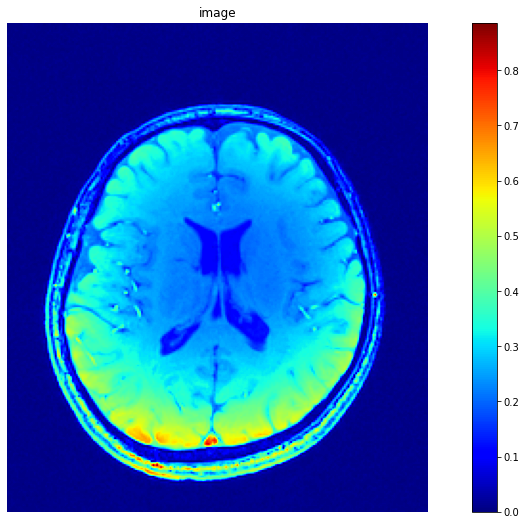

In [16]:
img_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/mri_brain_gre.tiff'
img = rgb2gray(io.imread(img_url))
print(img.shape,img.dtype)
plt.figure(figsize=myfigsize)
plt.imshow(img,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.title('image')
plt.show()